<a href="https://colab.research.google.com/github/SantiagoTangarife/Clasificaci-n-de-la-probabilidad-de-ocurrencia-de-ataque-cardiaco/blob/main/RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
data = df.copy()

In [19]:
data
df_copy = data.sample(frac=0.9, random_state=1)
data10 = data.drop(df_copy.index)

In [44]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt


# Separa las características, en y es la salida, y en X todas menos output
y = df_copy['output']
X = df_copy.drop(columns=['output'])



In [ ]:
data10.sample(n=1, random_state=1)

La red se esta entrenando...
Finalizo el entrenamiento


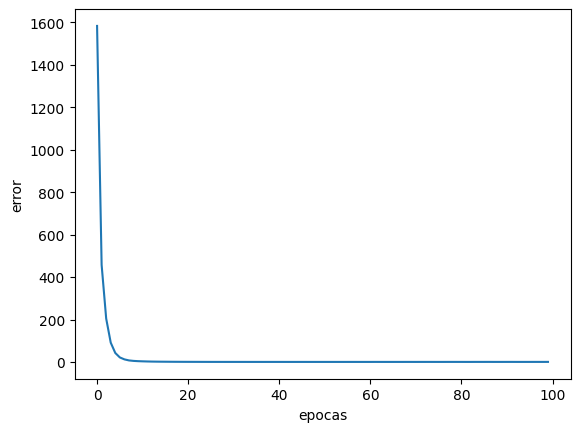

In [46]:
from tensorflow.python.ops.logging_ops import Print
from keras.src.optimizers import optimizer


# Modelo de la red neuronal
#una capa con 13 entradas, 26 neuronas en una capa interna
model = keras.Sequential([
    keras.layers.Dense(units=26, input_shape=[13])
])

#optimizador encargado de ajustar pesos en la red neuronal de a 0.1 para que se ajuste
#metrica de perdida para el seguimiento indica como va el seguimiento --> arregla grandes errores aunque sean pocos que corregir pequeños errores aunque sean muchos

# Compila el modelo
#model.compile(optimizer='sgd', loss='mean_squared_error')
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)
print("La red se esta entrenando...")
# Entrenamiento del modelo, verbose falso para mejorar la visual
entrenamiento=model.fit(X, y, epochs=100, verbose=False)
print("Finalizo el entrenamiento")

#ver el comportamiento de la red
plt.xlabel("epocas")
plt.ylabel("error")
plt.plot(entrenamiento.history["loss"])
plt.show()


In [47]:

# Realiza una predicción
#tomo un dato del 10% restante y sus caracteristicas
fila=data10.sample(n=1, random_state=1)
#fila['output'].values[0]
#print(fila)

#tomo solo sus caracteristicas como entrada
nuevos_datos = fila.drop(columns=['output'])
valor_pred = model.predict(nuevos_datos)

salidaEsperada=fila['output'].values[0]

print("Valor Red:", valor_pred[0][0])
print("Valor Real:", salidaEsperada)


1/1 [==============================] - 0s 54ms/step
Valor Red: 0.35277855
Valor Real: 0


In [ ]:
 #Guardo la red por si depronto sirve y los pesos W
model.save('redNeuronal.h5')
model.save_weights('pesos.h5')